# Computación Científica - Tarea 1
---
Vicente Lizana Estivill  
vlizana@alumnos.inf.utfsm.cl  
201310004-K

---

## Introducción
---

En esta tarea se busca familiarizarse con las funcionalidades de diversas bibliotecas de Python, utilizadas en el ámbito de la computación científica. Principalmente Numpy para manejo de arreglos n-dimensionales, SciPy para aplicaciones mas prácticas de estos vectores, SymPy para el manejo de álgebra simbólica y Matplotlib para la representación gráfica de diversos recursos en análisis numérico.

## Desarrollo y Análisis de Resultados
---

### Bibliotecas
---

In [2]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import sympy as sym
import scipy as sp
import scipy.optimize as opt
import scipy.interpolate as ipt
from ipywidgets import interact

### Numpy y SciPy
---

#### Implemente el producto matriz vector y compare el resultado sobre matrices aleatorias con el producto matriz de numpy. Realice el experimento para $10.000$ de tamaño $100\times100$, presente los resultados en un histograma (numpy.histogram) de la norma del error entre su código y producto matriz vector de numpy.

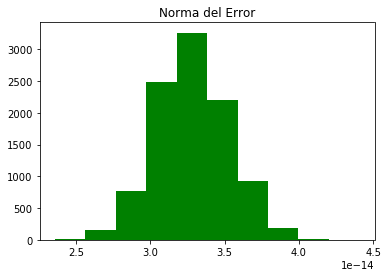

In [3]:
def matrix_vector_product(matrix, vector):
    vector = np.tile(vector, (100,1))
    result = matrix * vector
    result = result.sum(axis=1)
    return result


norms = []
for i in range(10000):
    test_matrix = np.random.random([100,100])
    test_vector = np.random.random([100])
    result = matrix_vector_product(test_matrix, test_vector) - test_matrix.dot(test_vector)
    norms.append(np.linalg.norm(result))
    
hist, bins = np.histogram(norms)
plt.bar(bins[:-1], hist, width = bins[1]-bins[0], color="green")
plt.title("Norma del Error")
plt.show()

#### Construya una matriz diagonal dominante con operaciones vectoriales. ¿Cómo demuestra que es diagonal dominante?

In [4]:
def create_dominant(n):
    dominant_matrix = np.random.random([n,n])
    dominant_vector = np.eye(n) * dominant_matrix.sum(axis=1)
    dominant_matrix = dominant_matrix + dominant_vector
    return dominant_matrix

dominant_matrix = create_dominant(5)
print(dominant_matrix)

[[ 2.52377969  0.62254661  0.42655479  0.91397811  0.39377737]
 [ 0.95158375  2.88146001  0.16940436  0.68267753  0.35820832]
 [ 0.11325409  0.44924785  2.50855303  0.47298857  0.81751256]
 [ 0.5186021   0.95867919  0.37628281  3.31932018  0.84922328]
 [ 0.96979321  0.56636501  0.7632583   0.31404102  3.4266863 ]]


Es diagonalmente dominante ya que creamos una matriz aleatoria y a cada uno de los elementos de la diagonal le sumamos la suma de los elementos de la fila, lo que quiere decir que a lo más el elemento de la entrada diagonal de la fila es igual a la suma de los demás (solo si es que en la matriz original era cero).

#### Multiplique 2 matrices diagonal dominante, ¿Es la matriz resultante diagonal dominante?

El siguiente código genera mediante el algoritmo del ejercicio anterior matrices diagonalmente dominantes y si al multiplicarse por sí misma alguna de estas matrices deja de ser dominante, la variable _flag_ pasa a ser falsa.

In [5]:
def is_dominant(matrix):
    for i in range(matrix.shape[0]):
        cont = 0
        for j in range(matrix.shape[1]):
            if i != j:
                cont += j
        if cont > matrix[i,i]:
            return False
    return True

flag = True
for i in range(100):
    dominant_matrix = create_dominant(5)
    if not is_dominant(dominant_matrix.dot(dominant_matrix)):
        flag = False
print("Las matrices resultantes son diagonal dominantes?")
print(flag)

Las matrices resultantes son diagonal dominantes?
False


#### Resuelva los siguientes sistemas de ecuaciones lineales para los $x_i$'s:

1. $x_1+1=x_2$, $x_1+x_2=10$
2. $\displaystyle{\sum_{i=1}^{20} x_{i}}=1$, $\displaystyle{\sum_{i=1}^{20} a_{j,i}\,x_{i}}=1$, para $j=2 \dots 20$ y $a_{j,i}=(i+j)\exp{-(i-j)}$

In [6]:
a_1 = np.array([[1,-1],[1,1]])
b_1 = np.array([-1,10])
x_1, x_2 = np.linalg.solve(a_1, b_1)

print("1.-")
print("x1 =", x_1)
print("x2 =", x_2, end="\n\n")

a_2 = np.ones([20,20])
for i in range(1,20):
    for j in range(20):
        a_2[i,j] = (i+j+2) * np.e ** -(j-i)
b_2 = np.ones([20,1])
sol_2 = np.linalg.solve(a_2, b_2)

print("2.-")
print("x_vector =", sol_2, sep="\n")

1.-
x1 = 4.5
x2 = 5.5

2.-
x_vector =
[[ -1.92318292e+12]
 [  3.02837595e+14]
 [  6.91265393e+14]
 [ -3.52907963e+15]
 [ -1.93018438e+15]
 [  4.10504073e+15]
 [ -4.94497910e+15]
 [ -1.23397865e+17]
 [  3.12866873e+17]
 [ -3.79356251e+17]
 [ -2.29779819e+18]
 [ -2.74159494e+18]
 [  1.75464602e+19]
 [  7.42637237e+19]
 [  1.61344001e+19]
 [ -1.66925962e+20]
 [ -1.31823513e+20]
 [ -5.18563551e+20]
 [ -8.94679103e+20]
 [  1.60928213e+21]]


#### Construya un código basdo en scipy.optimize que encuentré el mínimo de $F(a_0,a_1)=\displaystyle{\sum_{i=1}^{1000}}(\exp(x_i)-a_0-a_1\,x_i)$, donde $x_i=-1+\frac{2}{999}(i-1)$.

In [7]:
def x_i(i):
    return -1 + (2 * (i-1) / 999)

def F(a):
    x = np.arange(1,1001)
    x = (np.e ** x_i(x)) - a[0] - a[1] * x_i(x)
    return x.sum()

opt.minimize(F, [0,0], method="nelder-mead")

 final_simplex: (array([[  3.56214157e+41,  -1.93382892e+41],
       [  2.11260048e+41,  -1.14689656e+41],
       [  1.25292067e+41,  -6.80190321e+40]]), array([ -3.56214157e+44,  -2.11260048e+44,  -1.25292067e+44]))
           fun: -3.5621415720618623e+44
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 202
        status: 1
       success: False
             x: array([  3.56214157e+41,  -1.93382892e+41])

La función no tiene mínimo por lo que el algoritmo no ha terminado de manera exitosa. Se puede ver que el valor
de la función decrece a medida que aumentan las variables.

### SymPy
---

#### Obtenga el $\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ con sympy.

In [10]:
sym.init_printing(use_unicode=True)

x, i = sym.symbols('x i')
lim = sym.limit(sym.sin(x) / x, x, 0)
print(lim, end="\n\n")

1



#### Obtenga la derivada de $f(x)=\displaystyle{\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)}$

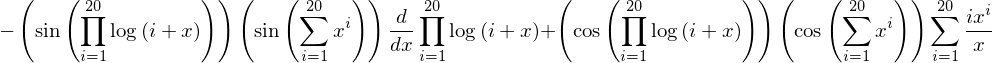

In [11]:
funct_1 = sym.sin(sym.Sum(x ** i, (i, 1, 20)))
funct_2 = sym.cos(sym.Product(sym.log(x+i), (i, 1, 20)))
sym.diff(funct_1 * funct_2, x)

#### Obtenga la parte real e imaginaria de la siguiente función compleja: $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$

In [12]:
z = x + sym.I
function = z ** 2 + 1
sym.expand(function)

In [16]:
print("Parte Real:")
sym.re(sym.expand(function))

Parte Real:


In [17]:
print("Parte Imaginaria:")
sym.im(sym.expand(function))

Parte Imaginaria:


#### Obtenga la inversa de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

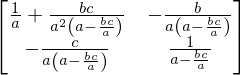

In [15]:
a, b, c = sym.symbols('a b c')
mat = sym.Matrix([[a, b],[c, a]])
mat.inv()

#### Obtenga los valores y vectores propios de $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$, donde $a,b,c \in \mathbb{R}$

Valores Propios:


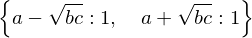

In [18]:
new_mat = sym.Matrix([[a, b],[c, a]])
print("Valores Propios:")
new_mat.eigenvals()

Vectores Propios:


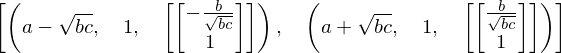

In [19]:
print("Vectores Propios:")
new_mat.eigenvects()

### Matplotlib
---

#### Construya un plot de las siguientes funciones $\sin(x)$, $\cos(x)$, $\exp(\sin(x))$, y $\exp(-\tan^2(x))$ para $x=[0,2\,\pi]$. Todos debes incluirse en el mismo gráfico con diferentes colores y líneas sólidas. Debe incluir la leyenda respectiva, además de las etiquetas de los ejes y el título.

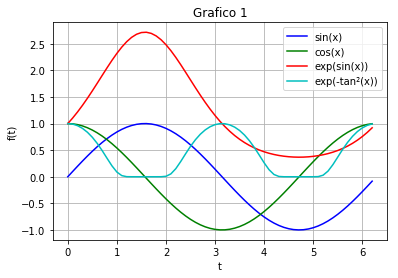

In [20]:
t = np.arange(0.0, 2*np.pi, 0.1)

fun_1 = np.sin(t)
fun_2 = np.cos(t)
fun_3 = np.e ** np.sin(t)
fun_4 = np.e ** -(np.tan(t) ** 2)

plt.plot(t, fun_1, "b-", label="sin(x)")
plt.plot(t, fun_2, "g-", label="cos(x)")
plt.plot(t, fun_3, "r-", label="exp(sin(x))")
plt.plot(t, fun_4, "c-", label="exp(-tan²(x))")

plt.title("Grafico 1")
plt.xlabel("t")
plt.ylabel("f(t)")

plt.grid()
plt.legend()
plt.show()

#### Genere $10^6$ números aleatorios de la distribución normal estandar, obtenga un histograma con 50 bins. Grafique el histograma y la distribución normal estandar. ¿Se parecen?

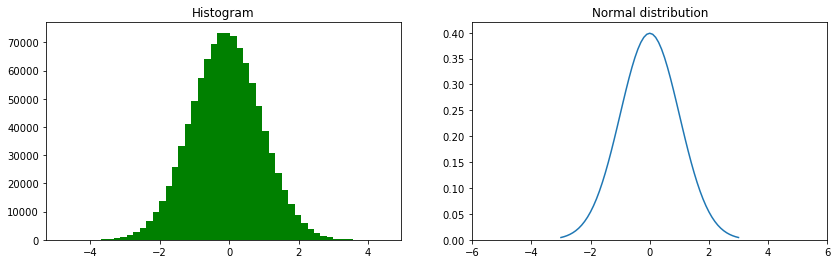

In [21]:
numbers = np.random.normal(size=10**6)
hist, bins = np.histogram(numbers, bins=50)

fig = plt.figure()
fig.set_figwidth(14)

x = np.linspace(-3, 3, 61)
plt.subplot(121)
plt.bar(bins[:-1], hist, width = bins[1]-bins[0], color="green")
plt.title("Histogram")


plt.subplot(122)
plt.plot(x, mlab.normpdf(x, 0, 1))
plt.axis([-6,6,0,0.42])
plt.title("Normal distribution")

plt.show()

Claramente existe coincidencia entre la forma teórica y el práctica.

#### Construya la siguiente curva parametrica en 3D: $\vec{r}(t)=\langle \cos(t), \sin(t), t \rangle$.

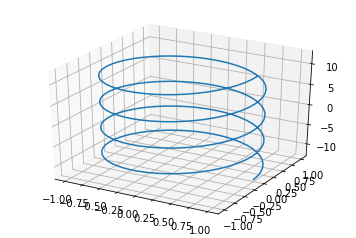

In [22]:
figure = plt.figure()
axis = figure.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 200)
axis.plot(np.cos(theta), np.sin(theta), theta)
plt.show()

#### Construya un plot en 2D de las ecuaciones de la pregunta 4.A de la sección Numpy y Scipy. ¿Puede encontrar la solución observando la gráfica? ¿Se puede hacer lo mismo con 4.B?

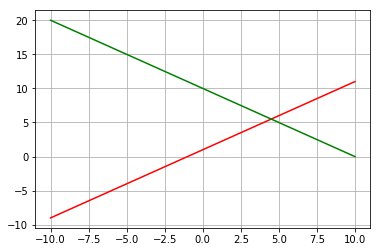

In [23]:
values = np.linspace(-10, 10, 101)
f_1 = 1 + values
f_2 = 10 - values

plt.plot(values, f_1, "r-")
plt.plot(values, f_2, "g-")
plt.grid()
plt.show()

La solución corresponde a la intersección de las rectas, no se puede graficar el segundo sistema de ecuaciones ya que necesitariamos 20 dimensiones espaciales.

#### Construya un plot en 3D de la función $F(a_0,a_1)$ de la pregunta 5 de la sección Numpy y Scipy. ¿Puede encontrar el mínimo observando la gráfica?

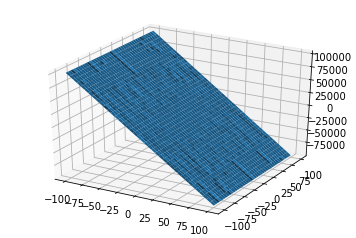

In [24]:
def new_x_i(i):
    return -1 + (2 * (i-1) / 999)

def new_F(a0, a1):
    x = np.arange(1,1001)
    x = (np.e ** new_x_i(x)) - a0 - a1 * new_x_i(x)
    return x.sum()

a0_points = np.tile(np.arange(-100, 101), (201,1))
a1_points = np.tile(np.arange(-100, 101), (201,1)).T
vF = np.vectorize(new_F)
evaluated = vF(a0_points, a1_points)

gca = plt.gca(projection="3d")
gca.plot_surface(a0_points, a1_points, evaluated)
plt.show()

Se puede apreciar que debido a la naturaleza de la función, ésta no tiene mínimo.

### Hands On
---

#### Busque numéricamente la raíz de $\sin(x)$ que está entre $3$ y $3.2$. Ya sabemos que corresponde a $\pi$, pero aquí se quiere encontrar una forma de determinar $\pi$.

In [25]:
opt.brenth(np.sin, 3, 3.2)

#### Grafique $\displaystyle{\frac{\sin(x)}{x}}$ en el intervalo $[-1,1]$. ¿Ocurre algún problema? ¿Cómo se puede corregir?

/home/vlizana/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


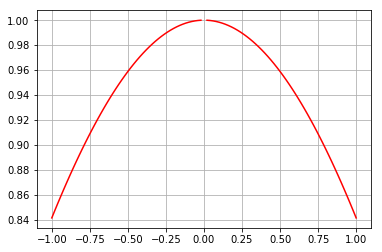

In [26]:
valuex = np.linspace(-1, 1, 101)
sinx_x = np.sin(valuex) / valuex
plt.plot(valuex, sinx_x, "r-")
plt.grid()
plt.show()

Como podemos ver en el Warning, tenemos un problema cuando $x=0$. Si nuestro arreglo de preimágenes no contiene al $0$ el computador no detecta ninguna discontinuidad, por lo que sería una forma de parchar el problema.

#### Considere los siguientes puntos: $(0.1,0.7, 4.2)$, $(0.5,0.5, 3.3)$, $(0.9,0.7, 4.2)$ y $(0.18,0.3, 2.5)$. Grafique lo puntos utilizando la función scatter de matplotlib. ¿Cuál es la mejor función lineal que aproxima esos puntos?

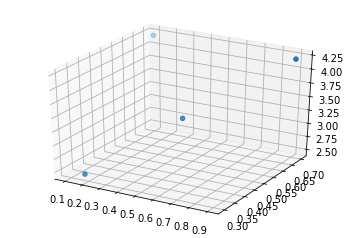

In [27]:
x = np.array([0.1, 0.5, 0.9, 0.18])
y = np.array([0.7, 0.5, 0.7, 0.3])
z = np.array([4.2, 3.3, 4.2, 2.5])

gca = plt.gca(projection="3d")
gca.scatter3D(x, y, z)
plt.show()

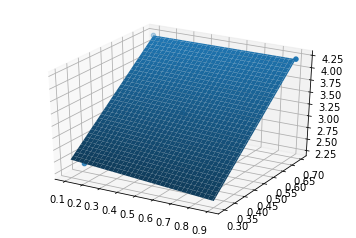

In [28]:
interp = ipt.interp2d(x, y, z, kind="linear")

#x_mat = np.tile(np.linspace(0, 1, 11),(11, 1))
#y_mat = np.tile(np.linspace(0, 1, 11),(11, 1)).T
#images = interp(np.linspace(0, 1, 11), np.linspace(0, 1, 11))

x_mat = np.tile(np.linspace(0.1, 0.9, 101),(101, 1))
y_mat = np.tile(np.linspace(0.3, 0.7, 101),(101, 1)).T
images = interp(np.linspace(0.1, 0.9, 101), np.linspace(0.3, 0.7, 101))


gca2 = plt.gca(projection="3d")
gca2.plot_surface(x_mat, y_mat, images)
gca2.scatter3D(x, y, z)
plt.show()

La mejor función lineal que aproxima esos puntos es el plano graficado.

#### Construya los siguientes campos vectoriales en 2D: $\langle x,y\rangle$,$\langle -y,x\rangle$ y $\langle x-y,x+y\rangle$ . ¿Qué patron observa?

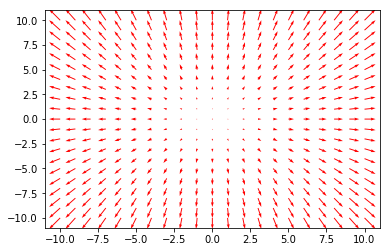

In [29]:
x = np.tile(np.linspace(-10, 10, 21),(21,1))
y = np.tile(np.linspace(-10, 10, 21),(21,1)).T
u = x
v = y
plt.quiver(x, y, u, v, color="red")
plt.show()

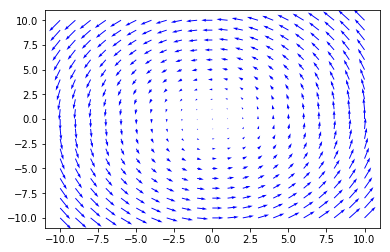

In [30]:
u = -y
v = x
plt.quiver(x, y, u, v, color="blue")
plt.show()

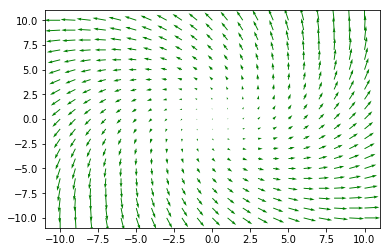

In [33]:
u = x-y
v = x+y
plt.quiver(x, y, u, v, color="green")
plt.show()

Si graficamos los campos juntos podemos ver que el primero y el segundo son perpendiculares mientras que el tercero bisecta a los otros dos.

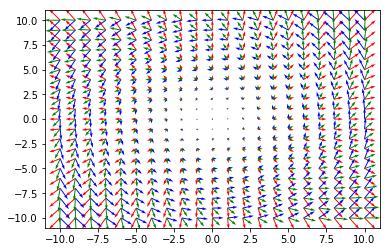

In [32]:
plt.quiver(x, y, x, y, color="red")
plt.quiver(x, y, -y, x, color="blue")
plt.quiver(x, y, x-y, x+y, color="green")
plt.show()

### Conclusiones
---

Luego de esta tarea conocemos más de cerca la potencia que pueden llegar a tener este tipo de bibliotecas. También actúa como guía de los conceptos matemáticos que sientan las bases de este curso, para poder repasarlos de manera adecuada posteriormente.

### Referencias
---

[Documentación de Numpy](http://www.numpy.org/)  
[Documentación de SciPy](https://www.scipy.org/)  
[Documentación de SymPy](http://docs.sympy.org/)  
[Documentación de Matplotlib](http://matplotlib.org)